In [2]:
!pip install music21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 9.5 MB/s eta 0:00:0000:0100:01m


In [2]:
import os
from music21 import converter, note, chord, stream
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [7]:
ABC_DIR = '/Users/ishitachawla/Documents/CSE253/nottingham/nottingham-dataset/ABC_cleaned'  # Replace with your actual path


In [4]:
# Initialize counters for various musical features
pitch_counter = Counter()
duration_counter = Counter()
key_counter = Counter()
time_signature_counter = Counter()

# Process each ABC file in the directory
for filename in os.listdir(ABC_DIR):
    if filename.endswith('.abc'):
        file_path = os.path.join(ABC_DIR, filename)
        try:
            # Parse the ABC file using music21
            score = converter.parse(file_path)
            
            # Extract key signature
            key = score.analyze('key')
            key_counter[str(key)] += 1
            
            # Extract time signature
            ts = score.recurse().getElementsByClass('TimeSignature')
            if ts:
                time_signature_counter[str(ts[0])] += 1
            
            # Iterate through all notes and chords in the score
            for element in score.recurse().notes:
                if isinstance(element, note.Note):
                    pitch_counter[element.pitch.nameWithOctave] += 1
                    duration_counter[element.quarterLength] += 1
                elif isinstance(element, chord.Chord):
                    for n in element.notes:
                        pitch_counter[n.pitch.nameWithOctave] += 1
                        duration_counter[n.quarterLength] += 1
        except Exception as e:
            print(f"Error processing {filename}: {e}")



In [6]:
# Function to plot a bar chart for a given counter
def plot_counter(counter, title, xlabel, ylabel, top_n=20):
    most_common = counter.most_common(top_n)
    items = [item[0] for item in most_common]
    counts = [item[1] for item in most_common]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=items, y=counts, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


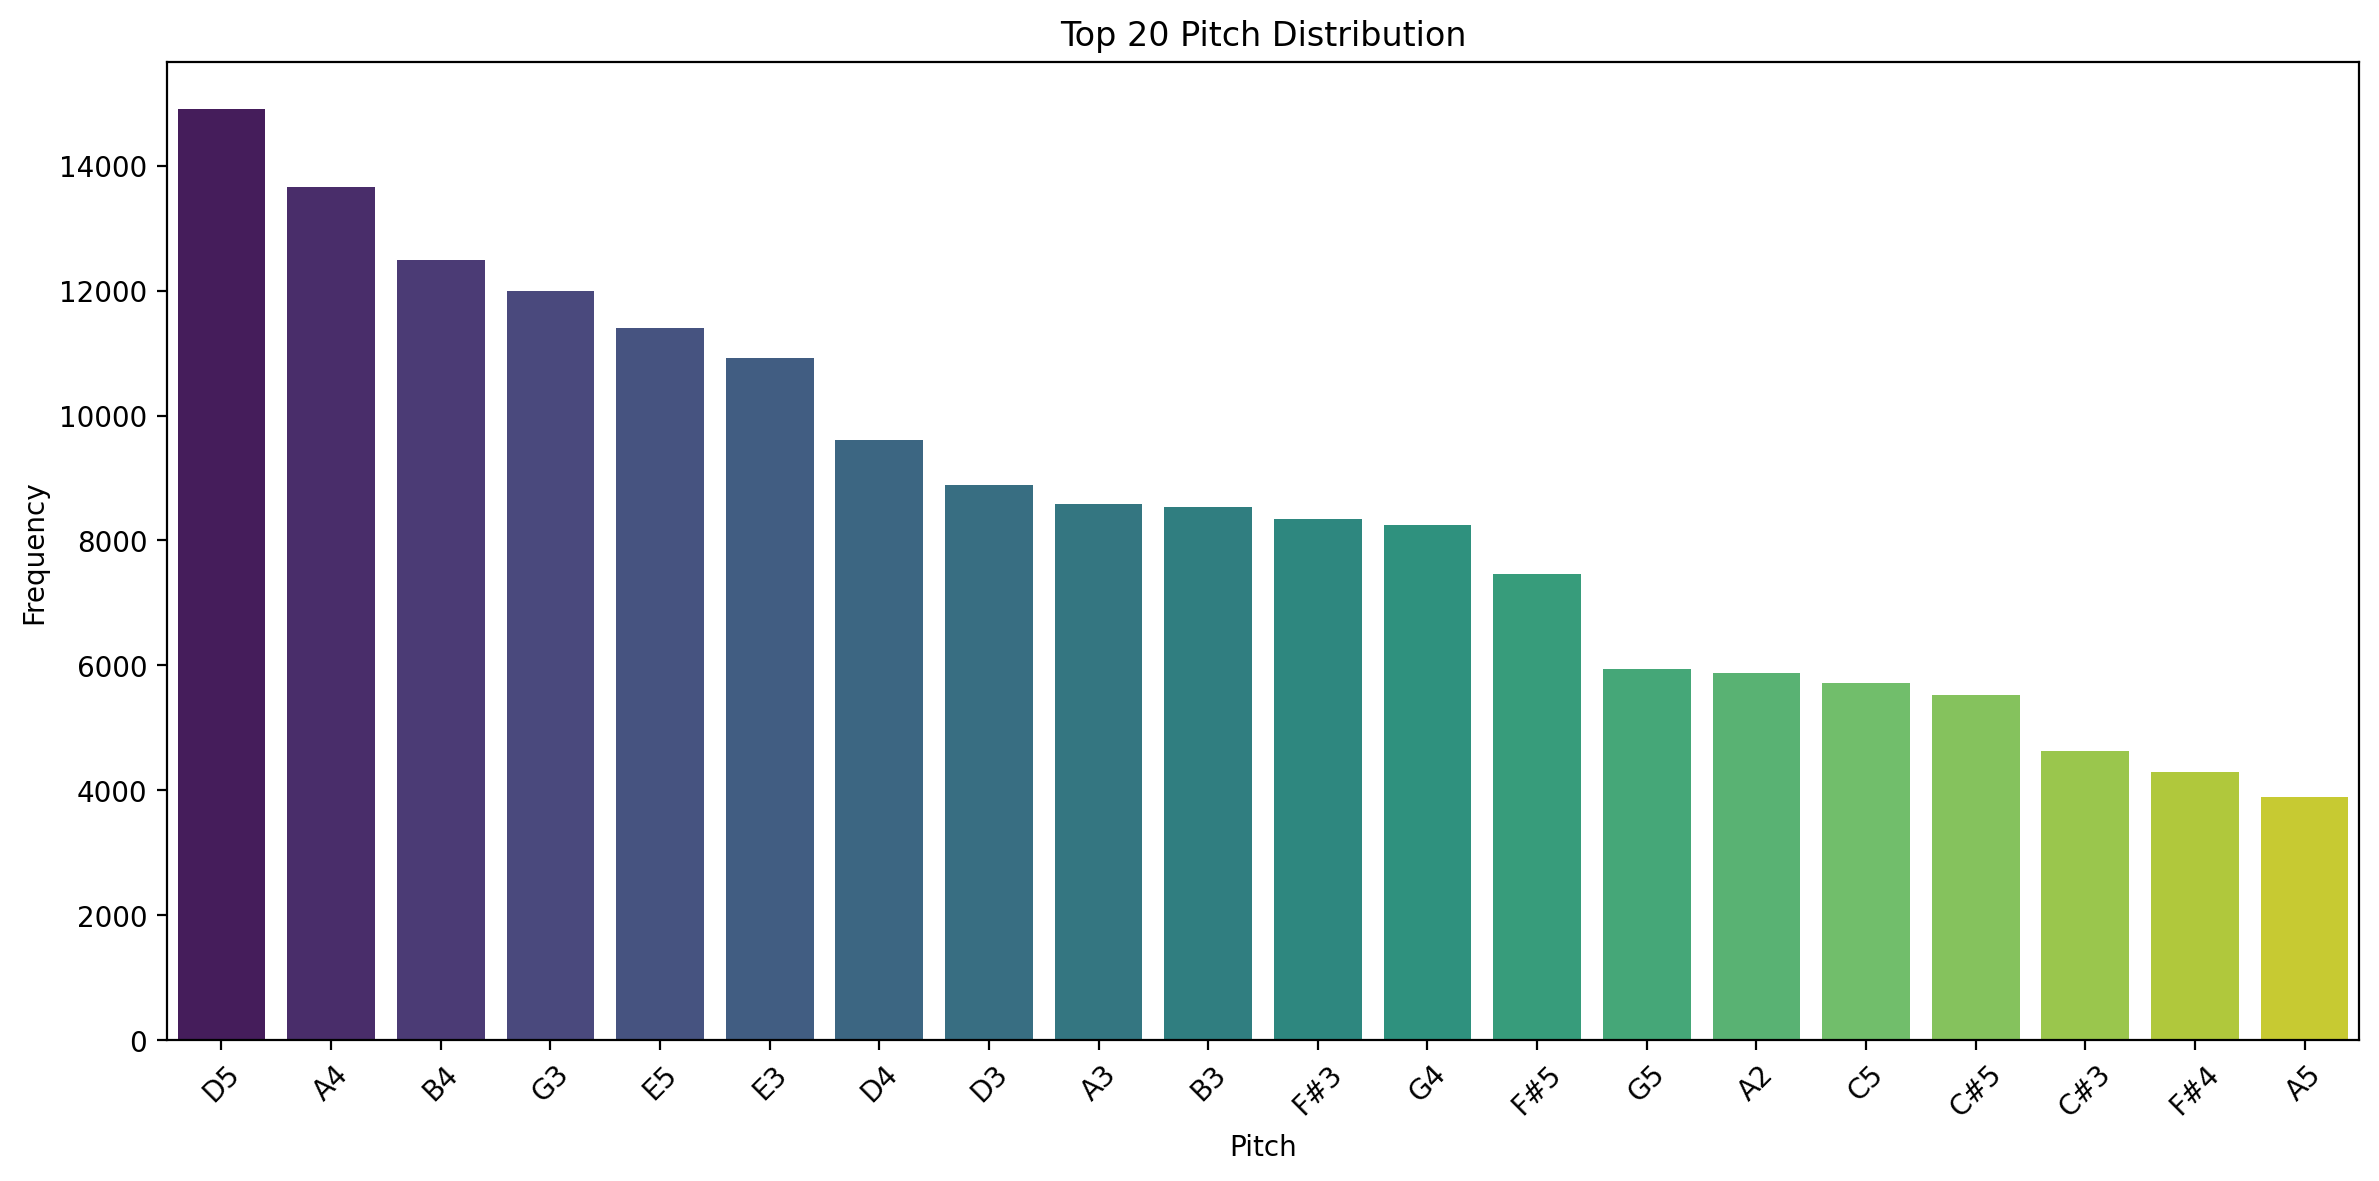

/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


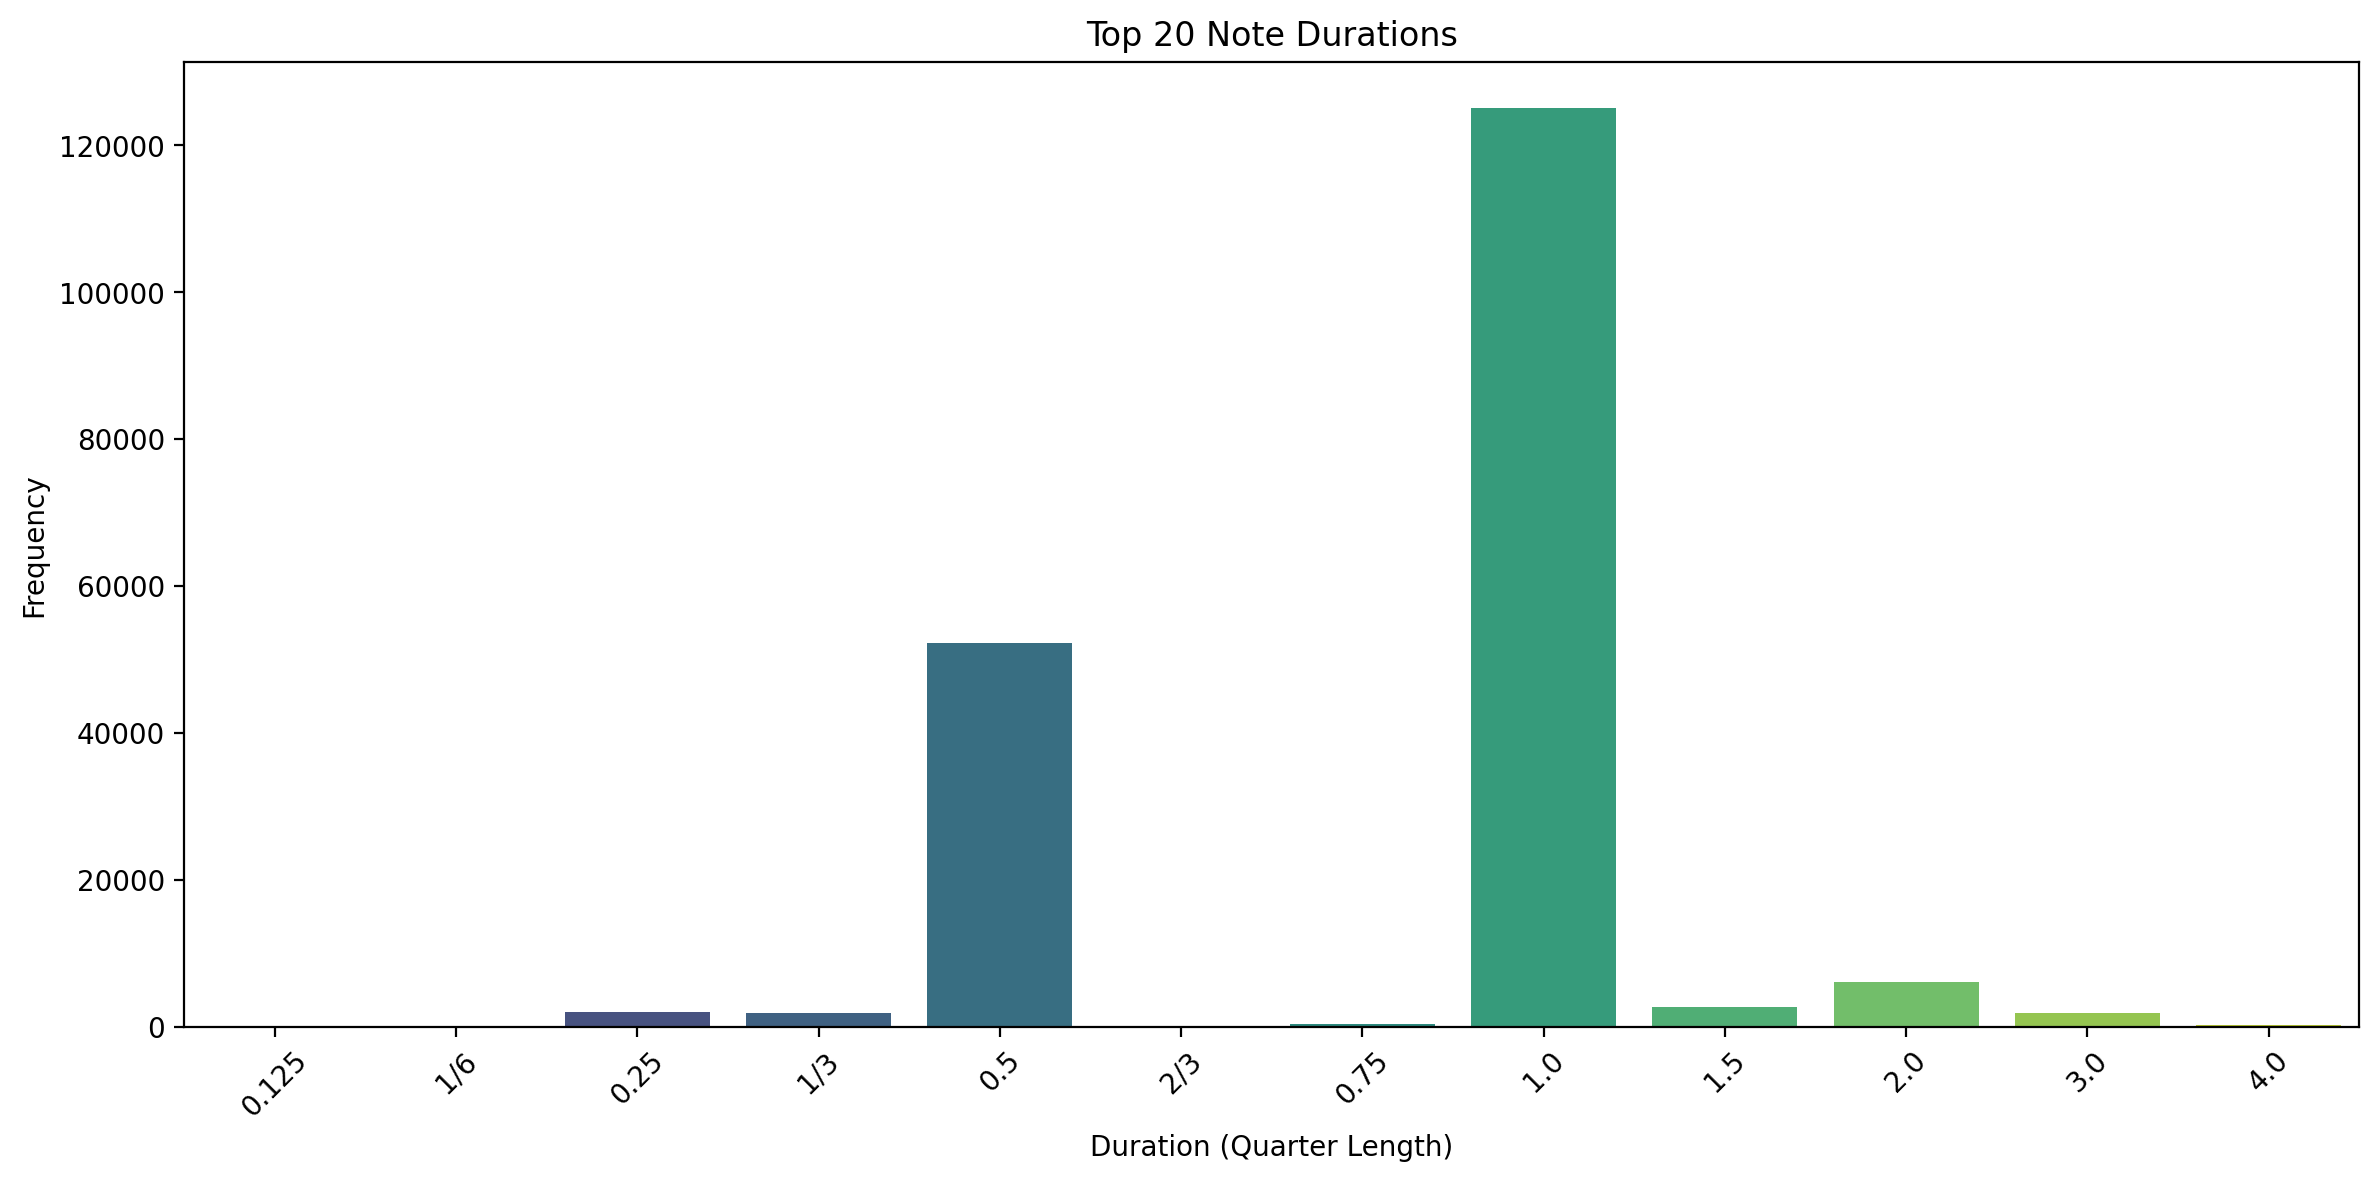

/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


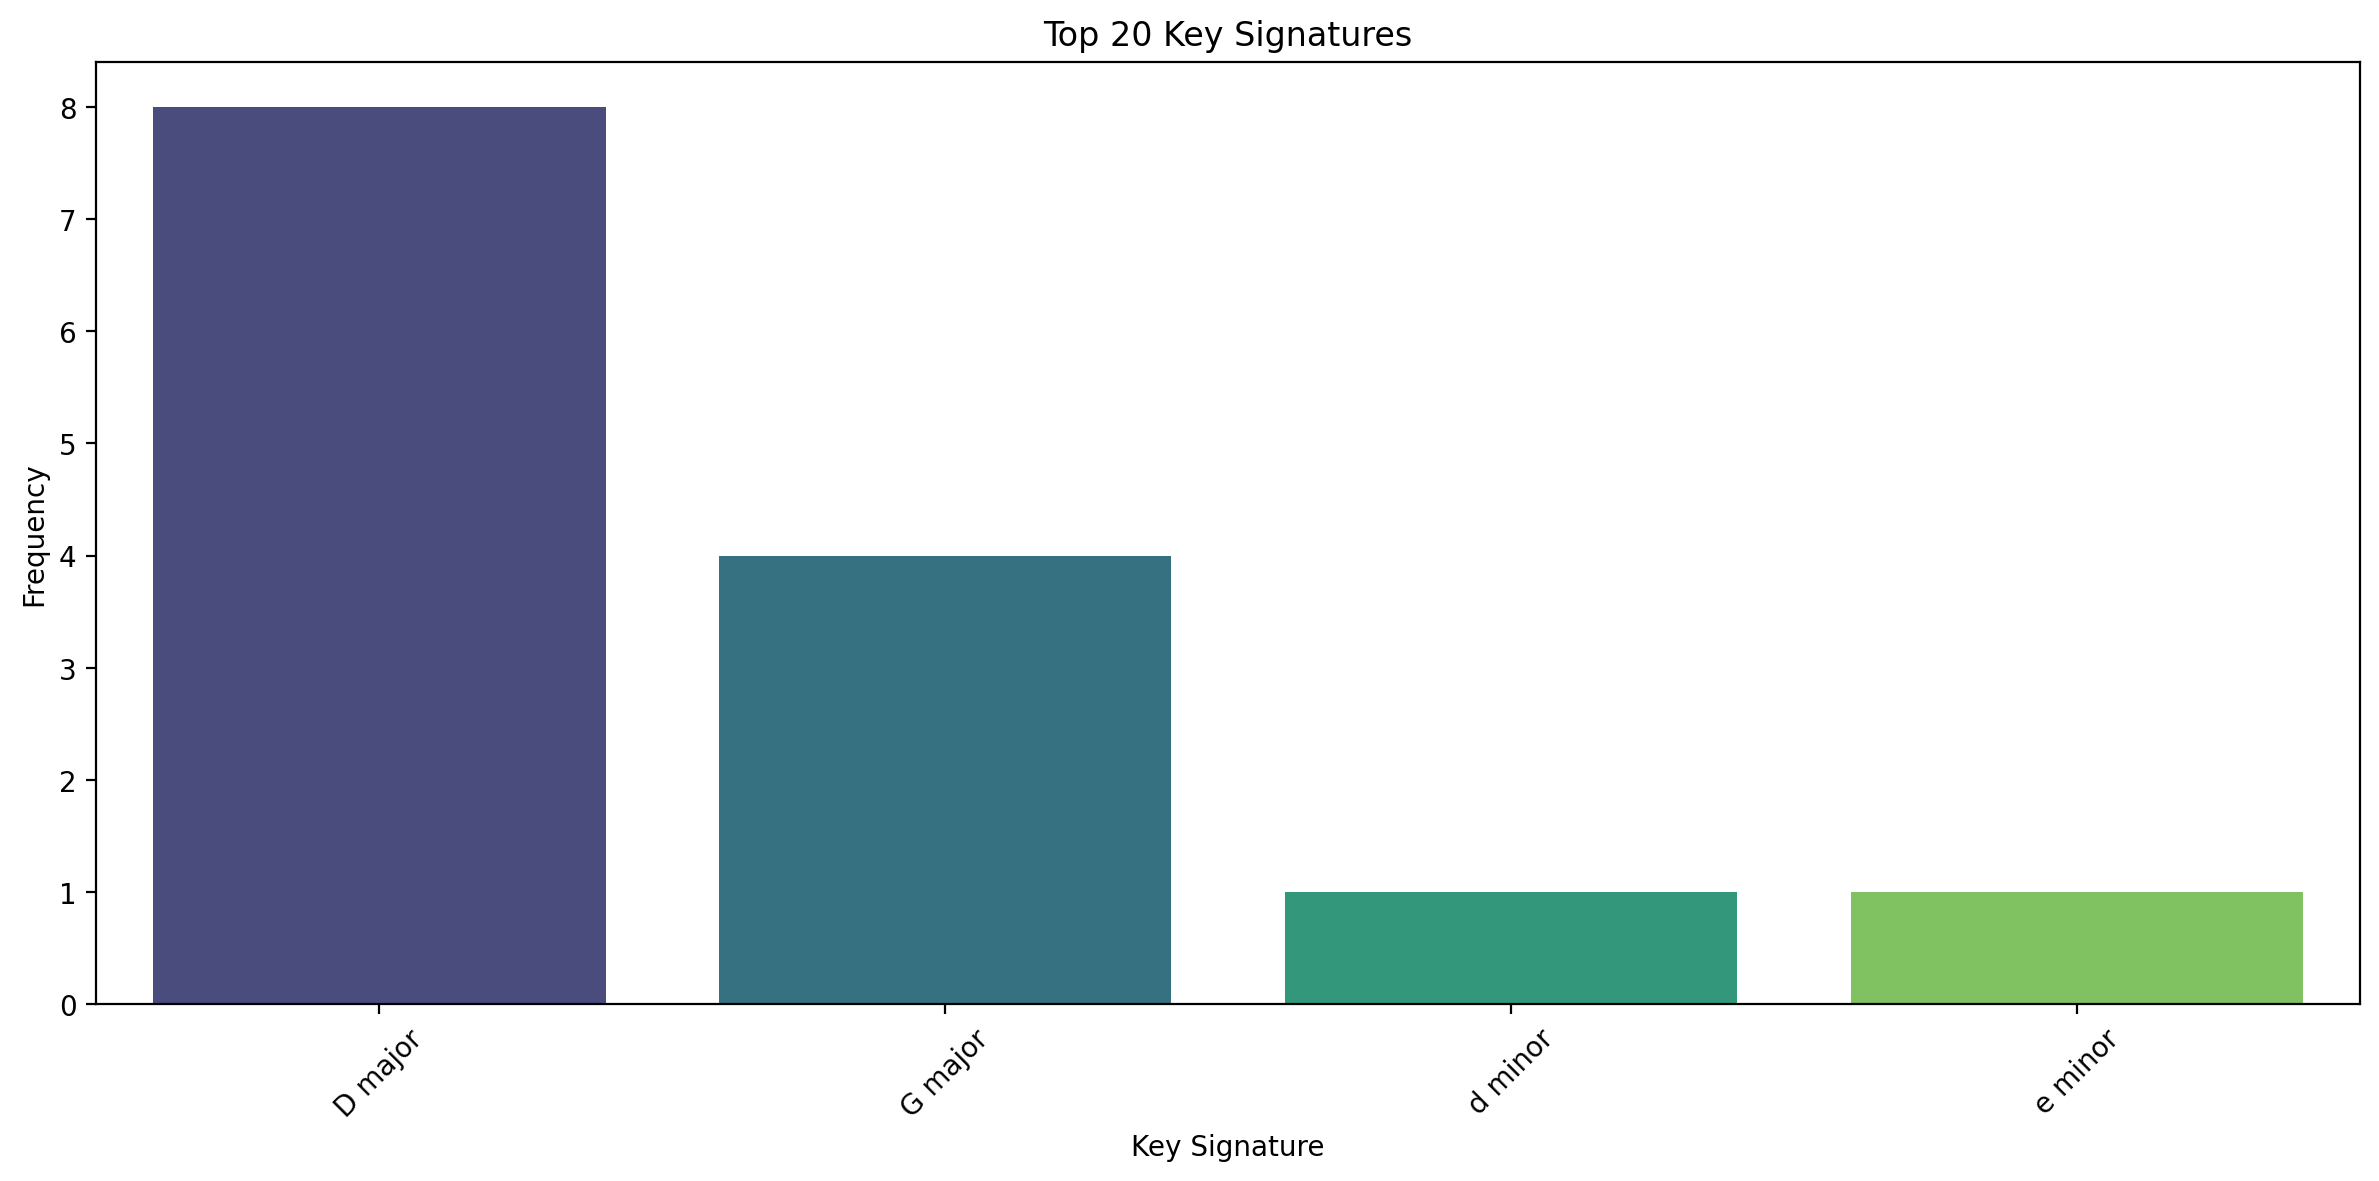

/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


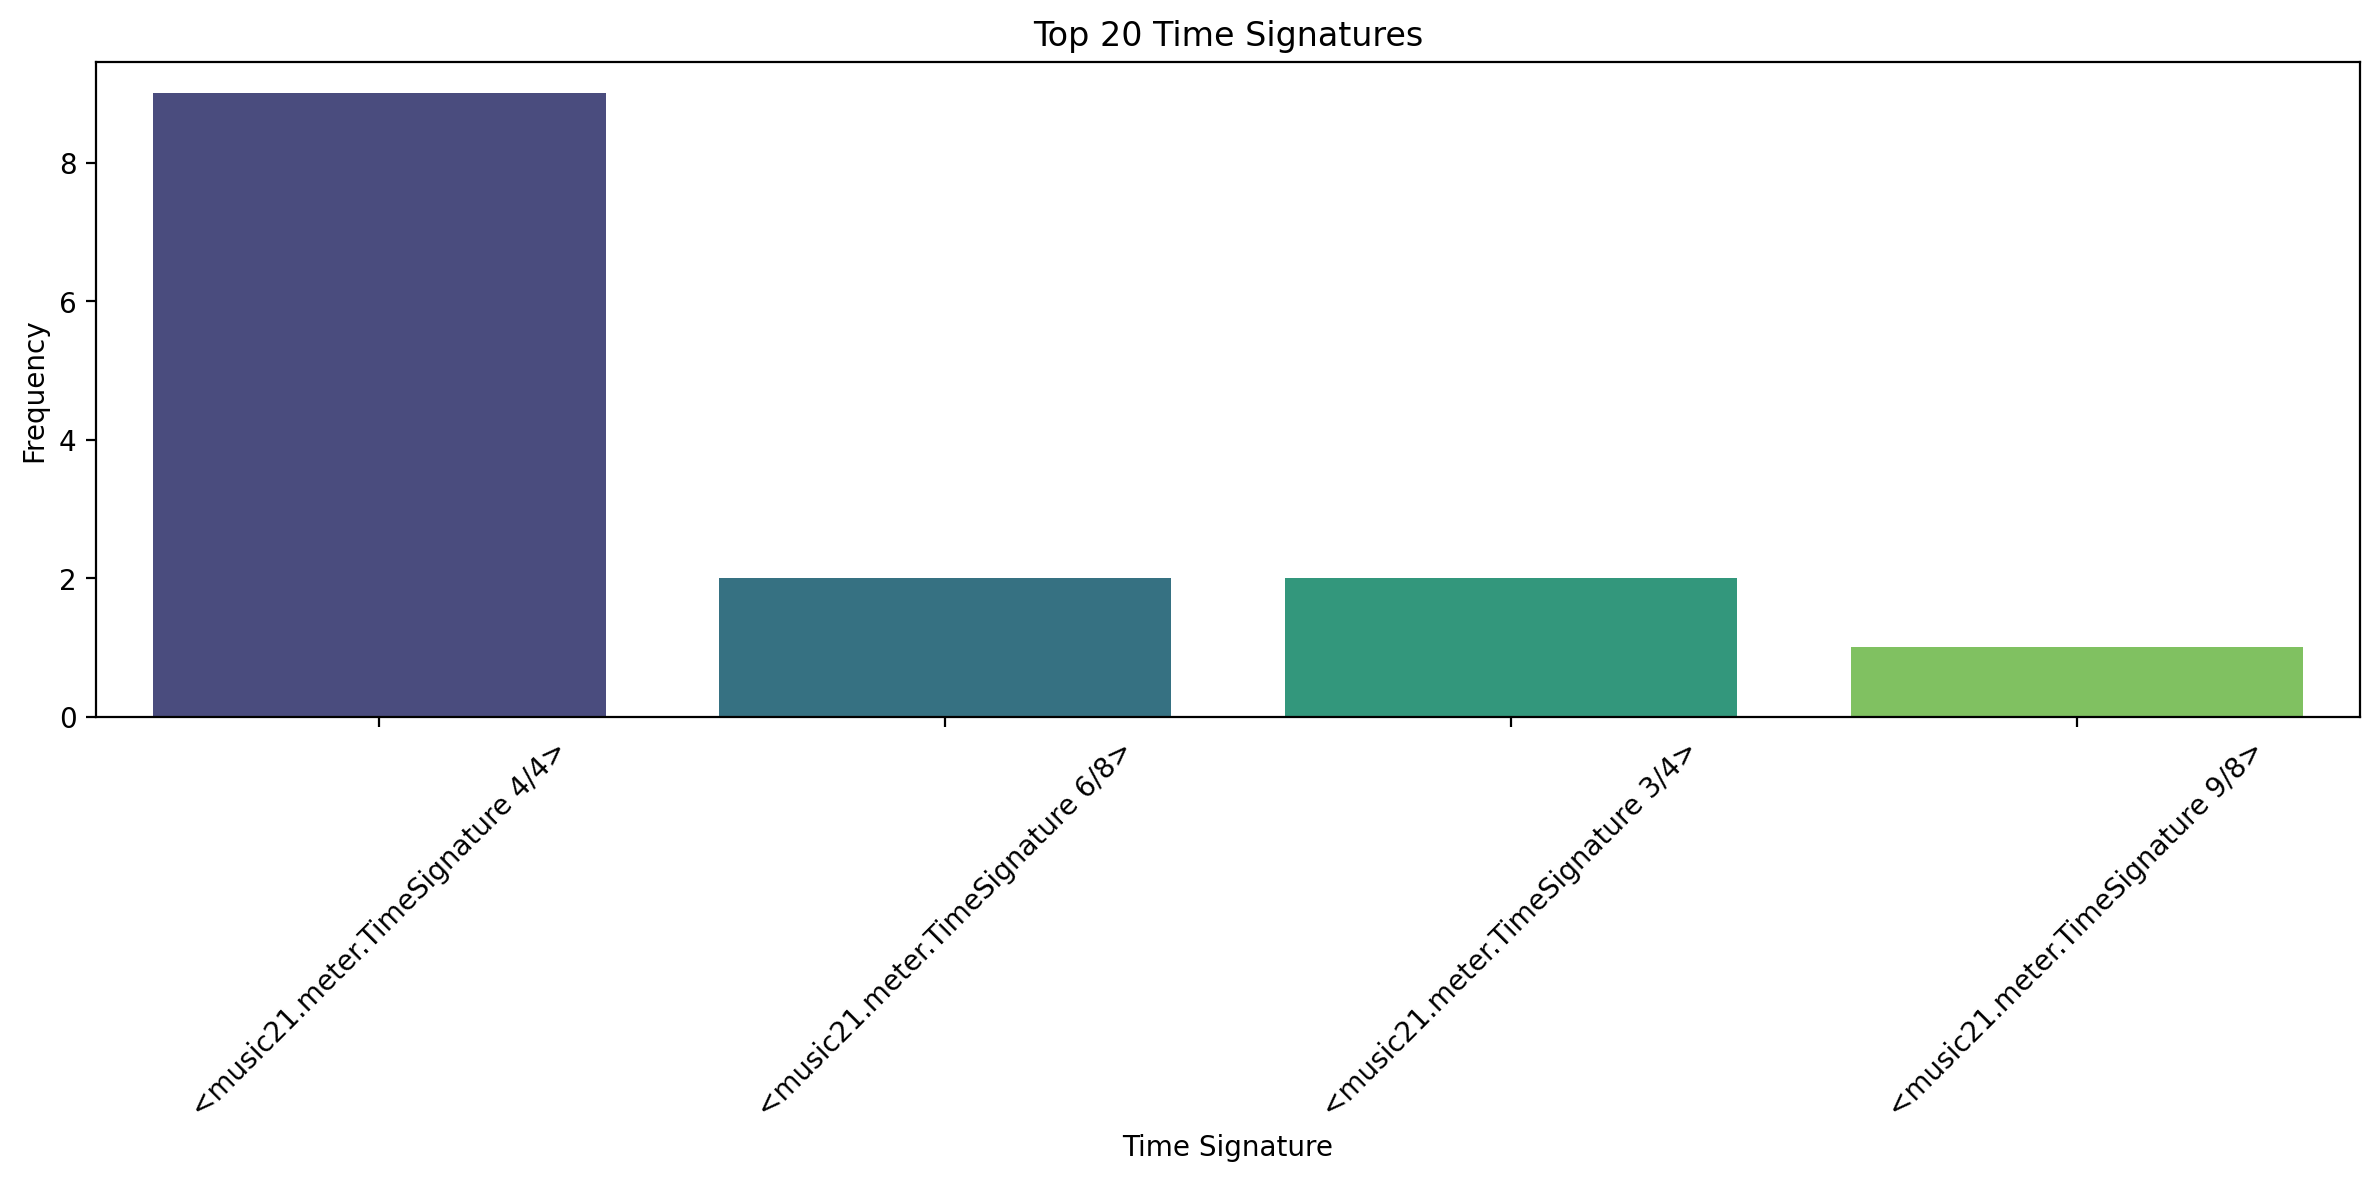

In [7]:
# Plot pitch distribution
plot_counter(pitch_counter, 'Top 20 Pitch Distribution', 'Pitch', 'Frequency')

# Plot note duration distribution
plot_counter(duration_counter, 'Top 20 Note Durations', 'Duration (Quarter Length)', 'Frequency')

# Plot key signature distribution
plot_counter(key_counter, 'Top 20 Key Signatures', 'Key Signature', 'Frequency')

# Plot time signature distribution
plot_counter(time_signature_counter, 'Top 20 Time Signatures', 'Time Signature', 'Frequency')


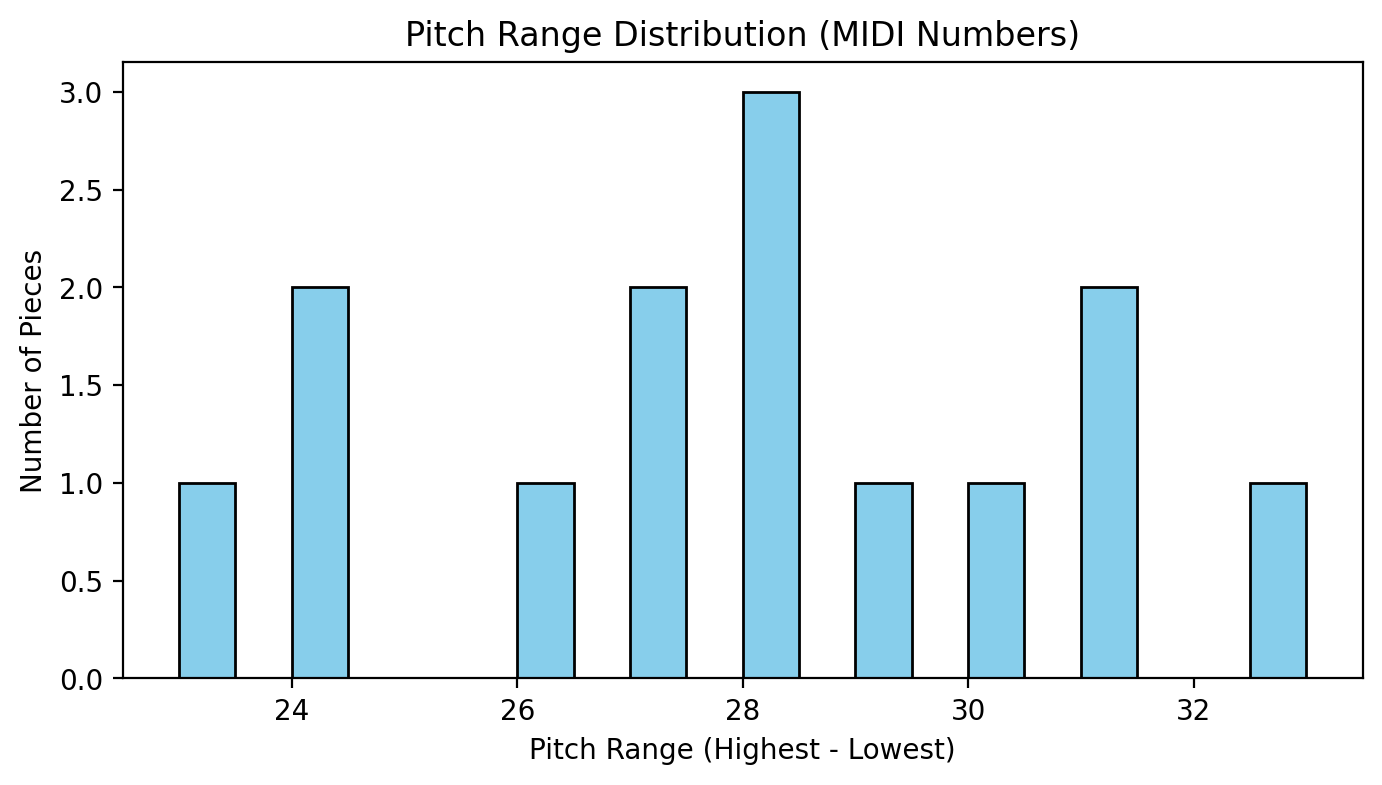

In [8]:
import numpy as np

pitch_ranges = []

for filename in os.listdir(ABC_DIR):
    if filename.endswith('.abc'):
        try:
            score = converter.parse(os.path.join(ABC_DIR, filename))
            pitches = [n.pitch.midi for n in score.recurse().notes if isinstance(n, note.Note)]
            if pitches:
                pitch_ranges.append(max(pitches) - min(pitches))
        except Exception as e:
            continue

plt.figure(figsize=(8, 4))
plt.hist(pitch_ranges, bins=20, color='skyblue', edgecolor='black')
plt.title('Pitch Range Distribution (MIDI Numbers)')
plt.xlabel('Pitch Range (Highest - Lowest)')
plt.ylabel('Number of Pieces')
plt.show()


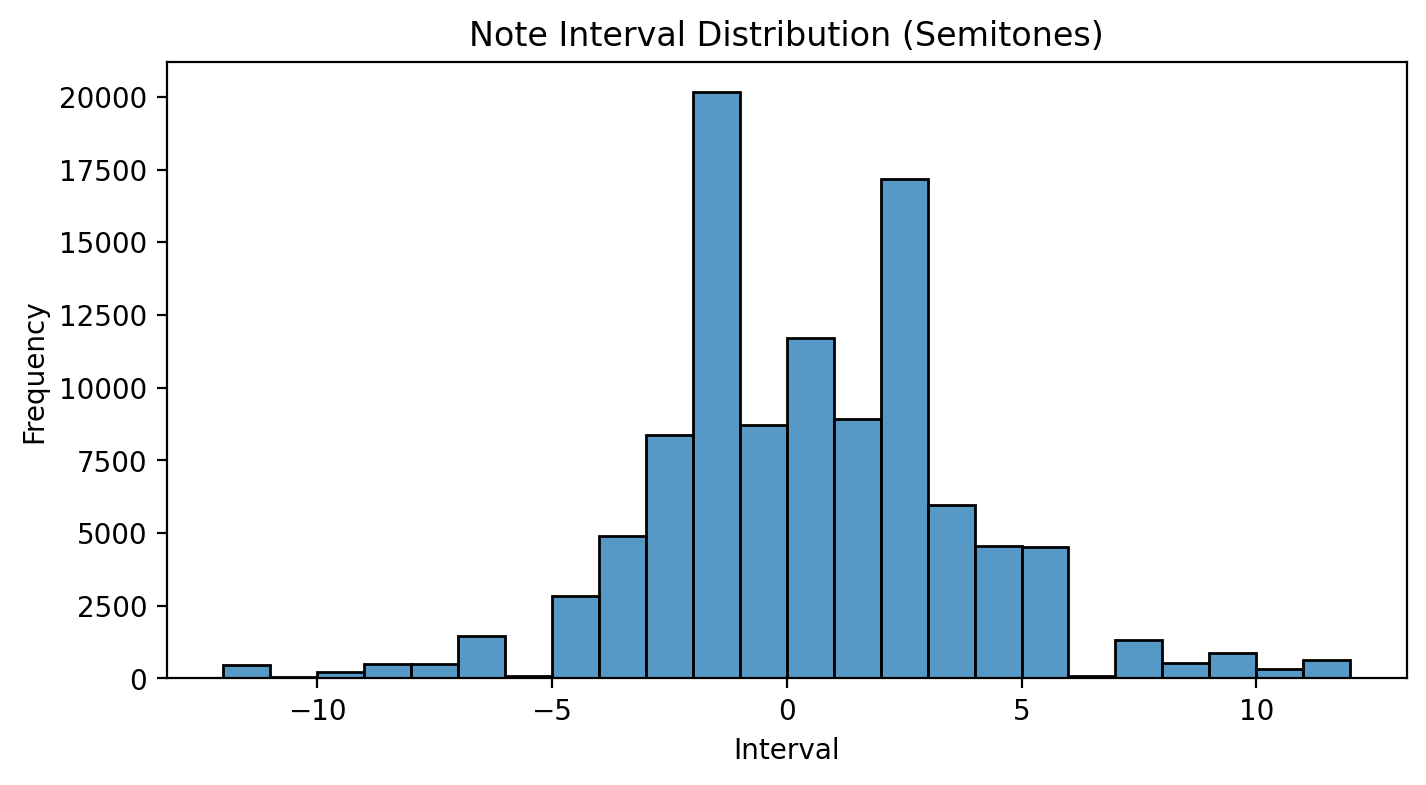

In [9]:
intervals = []

for filename in os.listdir(ABC_DIR):
    if filename.endswith('.abc'):
        try:
            score = converter.parse(os.path.join(ABC_DIR, filename))
            pitches = [n.pitch.midi for n in score.recurse().notes if isinstance(n, note.Note)]
            if len(pitches) > 1:
                diffs = np.diff(pitches)
                intervals.extend(diffs)
        except Exception as e:
            continue

plt.figure(figsize=(8, 4))
sns.histplot(intervals, bins=range(-12, 13), kde=False)
plt.title('Note Interval Distribution (Semitones)')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.show()


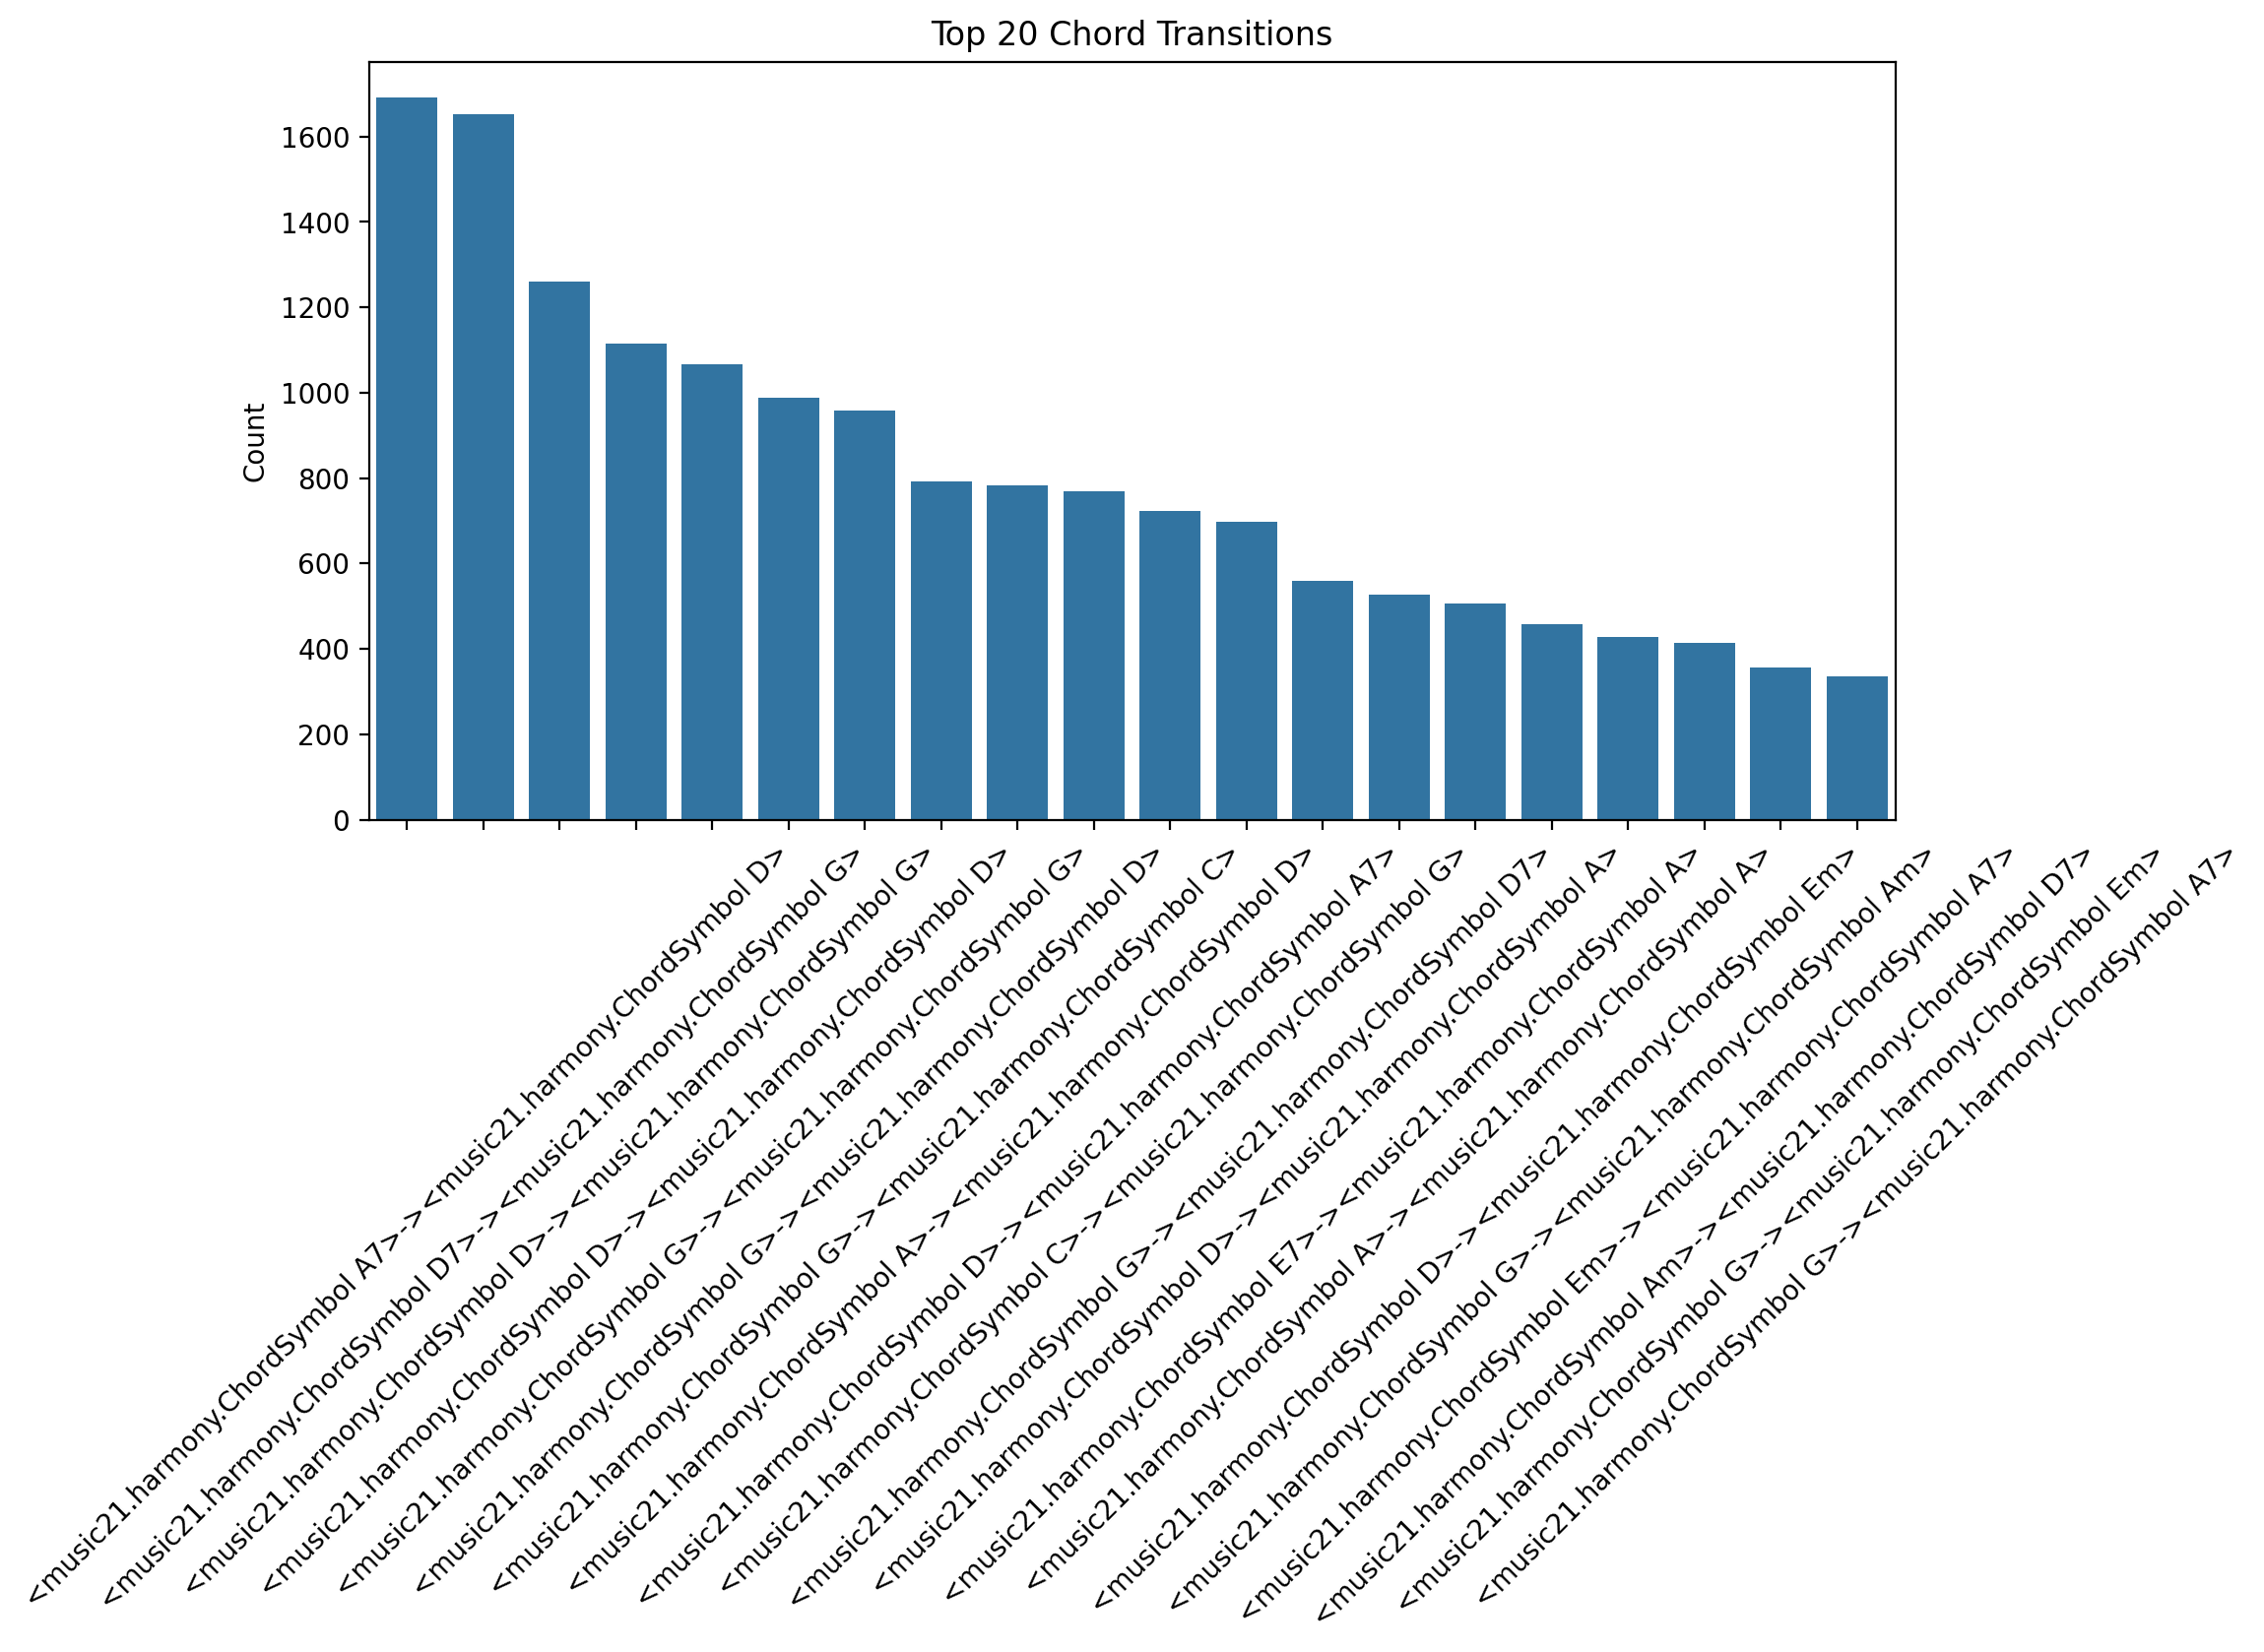

In [10]:
from collections import defaultdict

chord_bigrams = defaultdict(int)

for filename in os.listdir(ABC_DIR):
    if filename.endswith('.abc'):
        try:
            score = converter.parse(os.path.join(ABC_DIR, filename))
            chords = [str(c) for c in score.recurse().getElementsByClass('ChordSymbol')]
            for i in range(len(chords)-1):
                chord_bigrams[(chords[i], chords[i+1])] += 1
        except Exception as e:
            continue

# Top 20 chord transitions
top_chord_bigrams = Counter(chord_bigrams).most_common(20)
bigram_labels = [f"{a}->{b}" for a, b in [pair[0] for pair in top_chord_bigrams]]
counts = [pair[1] for pair in top_chord_bigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_labels, y=counts)
plt.xticks(rotation=45)
plt.title("Top 20 Chord Transitions")
plt.ylabel("Count")
plt.show()


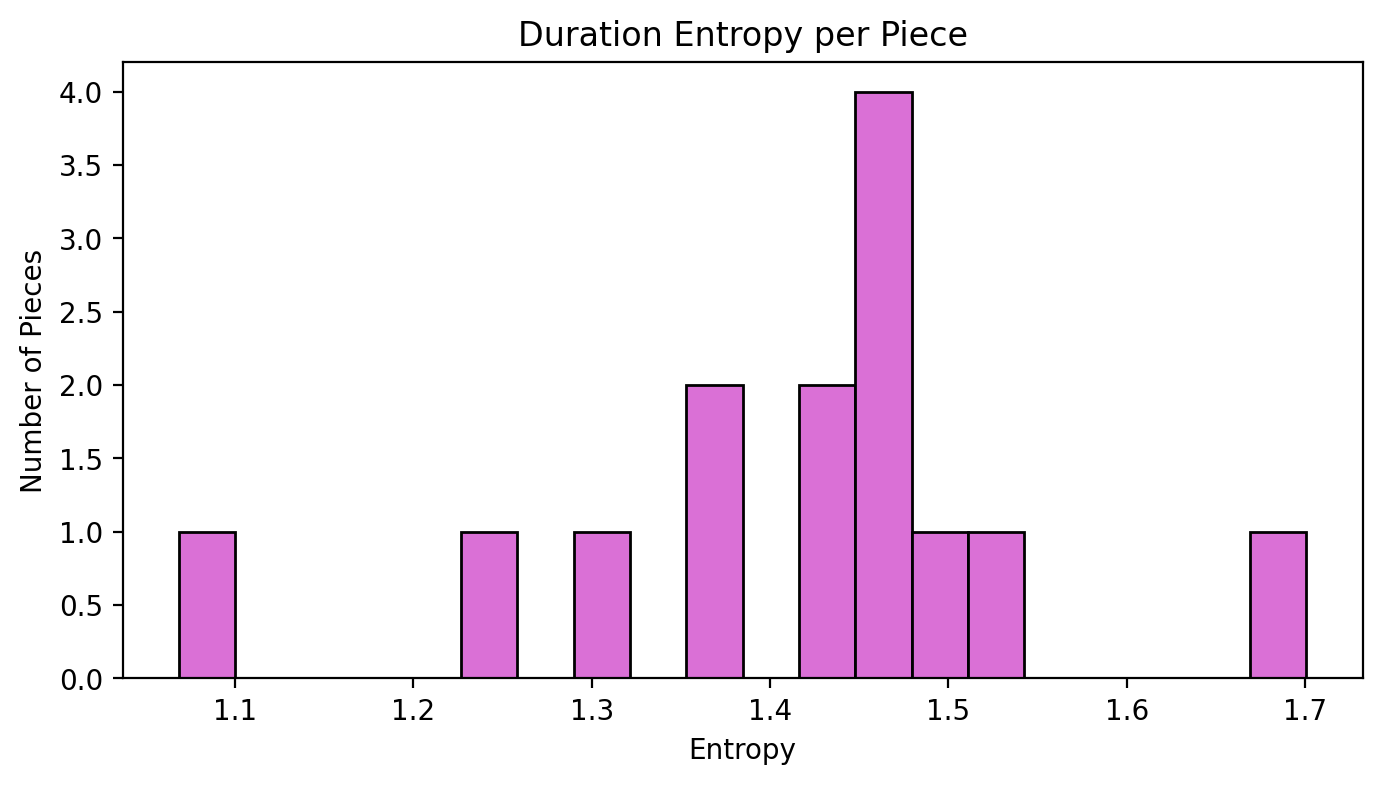

In [11]:
from scipy.stats import entropy

durations_all = []

for filename in os.listdir(ABC_DIR):
    if filename.endswith('.abc'):
        try:
            score = converter.parse(os.path.join(ABC_DIR, filename))
            durations = [n.quarterLength for n in score.recurse().notes]
            if durations:
                p = np.array(list(Counter(durations).values())) / len(durations)
                durations_all.append(entropy(p))
        except Exception as e:
            continue

plt.figure(figsize=(8,4))
plt.hist(durations_all, bins=20, color='orchid', edgecolor='black')
plt.title('Duration Entropy per Piece')
plt.xlabel('Entropy')
plt.ylabel('Number of Pieces')
plt.show()


In [15]:
MIDI_DIR = '/Users/ishitachawla/Documents/CSE253/nottingham/nottingham-dataset/MIDI_cleaned'  # Replace with your actual path

In [21]:
import glob
all_token_strings = []   # will hold EVERY note-event token (and EOS) in sequence
tune_boundaries    = []  # indices where each tune ends (for bookkeeping)

for abc_path in sorted(glob.glob(os.path.join(ABC_DIR, "*.abc"))):
    try:
        score = converter.parse(abc_path)  # let music21 auto-detect
    except Exception:
        # fallback: parse with no repeat expansion
        score = converter.parse(abc_path, format="abc", processRepeats=False)

    # Extract all Note objects in sequence order
    notes = [el for el in score.recurse().notes if isinstance(el, note.Note)]
    if len(notes) == 0:
        # skip tunes that have no notes
        continue

    # For each note, create a string token "pitch_duration"
    #   e.g. pitch=60, duration=1.0 → "60_1.0"
    for n in notes:
        midi_pitch = n.pitch.midi
        dur        = float(n.quarterLength)
        tok_str    = f"{midi_pitch}_{dur:.3f}"
        all_token_strings.append(tok_str)

    # After each tune, append a special EOS token
    all_token_strings.append("EOS")

    # Record the index where this tune ended
    tune_boundaries.append(len(all_token_strings) - 1)

print(f"Parsed {len(tune_boundaries)} tunes; total events (+EOS) = {len(all_token_strings)}")

Parsed 14 tunes; total events (+EOS) = 105149


In [22]:
unique_tokens = sorted(set(all_token_strings))
token_to_idx  = {tok: i for i, tok in enumerate(unique_tokens)}
idx_to_token  = {i: tok for tok, i in token_to_idx.items()}

vocab_size = len(unique_tokens)
print(f"Vocabulary size = {vocab_size} tokens")

Vocabulary size = 264 tokens


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
all_ids = torch.tensor([token_to_idx[t] for t in all_token_strings], dtype=torch.long)

In [26]:
from torch.utils.data import Dataset, DataLoader

class ABCSequenceDataset(Dataset):
    def __init__(self, all_ids, seq_len):
        """
        all_ids: a single 1D LongTensor of shape [N_total_events]
        seq_len: how many tokens per input window
        """
        self.ids     = all_ids
        self.seq_len = seq_len
        # number of training examples = (N_total_events - 1) - (seq_len - 1)
        self.N = len(all_ids) - seq_len

    def __len__(self):
        return self.N

    def __getitem__(self, idx):
        """
        Return (input_window, target_window) both of length seq_len.
        input_window = ids[idx : idx+seq_len]
        target_window = ids[idx+1 : idx+seq_len+1]
        """
        inp = self.ids[idx : idx + self.seq_len]
        tgt = self.ids[idx + 1 : idx + self.seq_len + 1]
        return inp, tgt

In [41]:
SEQ_LEN     = 50
BATCH_SIZE  = 16
NUM_EPOCHS  = 5
LEARNING_RT = 1e-3

# Split “all_ids” into train/val by a simple index cutoff
# e.g. first 90% of windows for train, last 10% for val
dataset = ABCSequenceDataset(all_ids, seq_len=SEQ_LEN)
n_total = len(dataset)
n_train = int(0.90 * n_total)
n_val   = n_total - n_train

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset, [n_train, n_val], generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

print(f"Train windows: {len(train_dataset)}, Val windows: {len(val_dataset)}")

Train windows: 94589, Val windows: 10510


In [42]:
class MusicRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(MusicRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden=None):
        # x: (batch_size, seq_length)
        x = self.embedding(x)                 # → (batch_size, seq_length, embedding_dim)
        out, hidden = self.rnn(x, hidden)     # → (batch_size, seq_length, hidden_dim)
        out = self.fc(out)                    # → (batch_size, seq_length, vocab_size)
        return out, hidden

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train(model, train_loader, val_loader, vocab_size,
          num_epochs=5, lr=0.001, device='mps'):
    device = torch.device(device if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        # --------- Training ---------
        model.train()
        total_train_loss = 0

        for batch in train_loader:
            # ─── Extract input tensor from batch ───
            if isinstance(batch, dict) and 'input_ids' in batch:
                x = batch['input_ids'].to(device)      # shape: (B, S)
            elif isinstance(batch, (list, tuple)):
                # assume batch is a tuple like (input_ids, labels) or just input_ids
                possible = batch[0] if len(batch) > 1 else batch
                x = possible.to(device)
            else:
                # assume batch is already a single tensor of shape (B, S)
                x = batch.to(device)

            # slice into inputs/targets
            inputs  = x[:, :-1]   # (B, S-1)
            targets = x[:, 1:]    # (B, S-1)

            optimizer.zero_grad()
            outputs, _ = model(inputs)                   # (B, S-1, Vocab)
            B, S, V = outputs.shape
            outputs = outputs.reshape(-1, V)             # (B*(S-1), Vocab)
            targets = targets.reshape(-1)                # (B*(S-1))

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)

        # --------- Validation ---------
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                # ─── Extract input tensor from batch ───
                if isinstance(batch, dict) and 'input_ids' in batch:
                    x = batch['input_ids'].to(device)
                elif isinstance(batch, (list, tuple)):
                    possible = batch[0] if len(batch) > 1 else batch
                    x = possible.to(device)
                else:
                    x = batch.to(device)

                inputs  = x[:, :-1]
                targets = x[:, 1:]

                outputs, _ = model(inputs)
                B, S, V = outputs.shape
                outputs = outputs.reshape(-1, V)
                targets = targets.reshape(-1)

                loss = criterion(outputs, targets)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)

        print(
            f"Epoch {epoch+1}/{num_epochs} | "
            f"Train Loss: {avg_train_loss:.4f} | "
            f"Val   Loss: {avg_val_loss:.4f}"
        )

tokenizer = REMI() 
# Example usage
if __name__ == "__main__":
    vocab_size = tokenizer.vocab_size
    embedding_dim = 256
    hidden_dim = 512
    num_layers = 2

    model = MusicRNN(vocab_size, embedding_dim, hidden_dim, num_layers)
    device = 'mps'
    train(model, train_loader, val_loader, vocab_size)

Epoch 1/20 | Train Loss: 1.0027 | Val   Loss: 0.3570
Epoch 2/20 | Train Loss: 0.3145 | Val   Loss: 0.3055
Epoch 3/20 | Train Loss: 0.2778 | Val   Loss: 0.2842
Epoch 4/20 | Train Loss: 0.2619 | Val   Loss: 0.2808


In [ ]:
def sample_sequence(model, start_token_id, max_length=200, temperature=1.0, device="mps"):
    """
    Generates a new token‐ID sequence of length up to `max_length`,
    starting from `start_token_id` (which should be the ID for "EOS" here).
    """
    model.eval()
    generated = [start_token_id]
    input_id  = torch.tensor([[start_token_id]], device=device)  # shape (1,1)
    hidden    = None

    for _ in range(max_length):
        out, hidden = model(input_id, hidden)       # out: (1, 1, V)
        logits      = out[:, -1, :]                 # → (1, V)
        logits      = logits / temperature
        probs       = F.softmax(logits, dim=-1)     # → (1, V)
        next_token  = torch.multinomial(probs, num_samples=1).item()
        generated.append(next_token)
        if next_token == token_to_idx["EOS"]:
            break
        input_id = torch.tensor([[next_token]], device=device)

    return generated  # list of token IDs

In [ ]:

start_token = tokenizer.special_tokens_ids[1]
generated_sequence = sample_sequence(model, start_token, max_length=1024)

print("Generated token sequence:")
print(generated_sequence)

In [ ]:
from midi2audio import FluidSynth # Import library
from IPython.display import Audio, display
fs = FluidSynth("FluidR3Mono_GM.sf3") # Initialize FluidSynth

output_score = tokenizer.tokens_to_midi([gen_tokens[i] for i in range(len(gen_tokens)) if gen_tokens[i] != "EOS"])
output_score.dump_midi(f"rnn.mid")
fs.midi_to_audio("rnn.mid", "rnn.wav")
display(Audio("rnn.wav"))
    

Epoch 1/20


KeyboardInterrupt: 